In [1]:
import pandas as pd
import numpy as np
import os, json
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
plt.style.use("ggplot")

import matplotlib.cm as cm 
from matplotlib.offsetbox import AnchoredText
def get_graph_base(max_n: int, 
                   line_color: str, 
                   offset_radius: int = 100,
                   ancor_text: str = "By: Kaustubh Pathak"):
    months = pd.Series([31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]).cumsum()
    angles = pd.Series(np.linspace(0, 2*np.pi*(max_n/365) , max_n))
    
    fig = plt.figure(figsize=(14,18)) 
    ax = fig.add_subplot(111, polar=True)
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi/2.0)
    ax.set_xticks(np.deg2rad(months/365.25*360).values)
    ax.set_xticklabels([ 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan'])
    ax.set_yticks([0+offset_radius,365+offset_radius, 2*365+offset_radius])
    ax.set_yticklabels(["", "", ""])
    
    ax.grid(True, color = "#000000", linewidth = "0.15", linestyle = "--" )
    
    radius = pd.Series(list(range(max_n))) + offset_radius
    
    # radius = [i+offset_radius for i in range(max_n)]
    
    ax.plot(angles, radius, "k", color = line_color, linewidth = "1.2", label = "Days Since 2020/01/01")
    ax.legend(loc = "upper right")
    ancor_text = AnchoredText(ancor_text, loc = "lower right", prop=dict(alpha=0.4))
    ax.add_artist(ancor_text)
    
    ax.set_title("COVID-19 Cases (11/01/2022)", y = 1.05, fontdict={"fontsize":26, "fontname": "impact"})
    return fig, ax, angles, radius


In [66]:
isos: list = ["USA"]
col: str = "new_cases"
refactor: float = 0.0005
colors: list = ["#6daa6b", "#f2665c"]
line_color: str = "#2A363B"
                 
dfs = []
for iso in isos:
    dfs.append(pd.read_csv(f"data/{iso}_Data.csv"))
max_n = dfs[0]["days_passed"].max()+1

/tmp/ipykernel_313/3130595449.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(angles, radius, "k", color = line_color, linewidth = "1.2", label = "Days Since 2020/01/01")


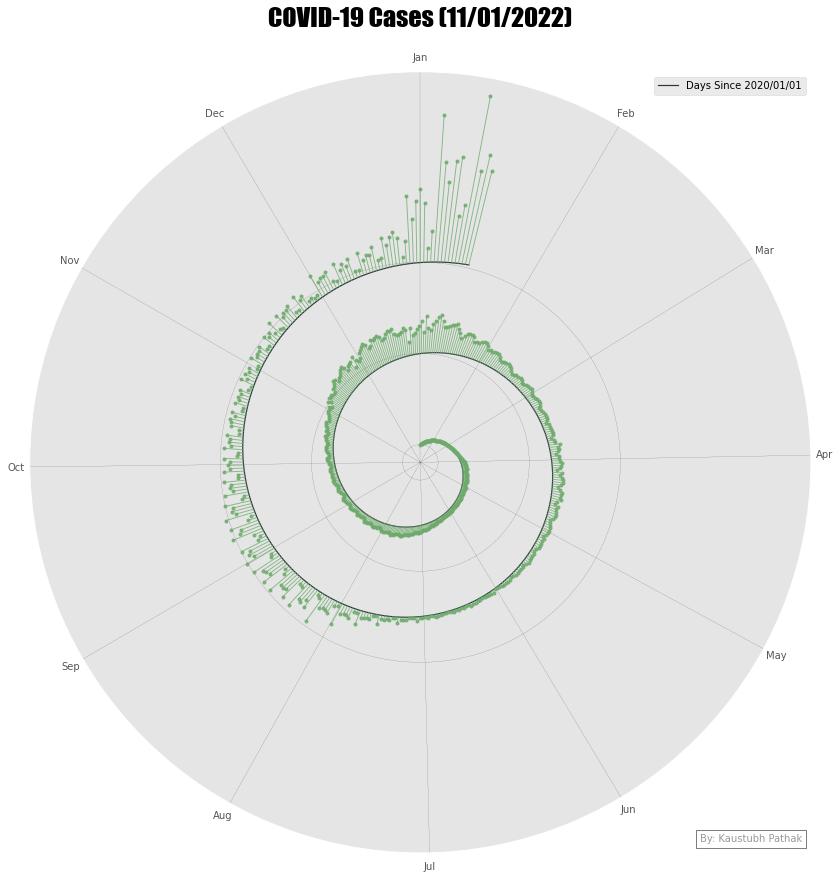

In [67]:

fig, ax, angles, radius = get_graph_base(max_n, line_color)
for df, color, cc in zip(dfs, colors, isos):
    cases_factor = (df[col])*refactor
    # ax.bar(angles, radius+cases_factor, color = color, alpha = 0.8, linewidth = 0, width = 0.4)
    ax.plot(angles, radius+cases_factor, ".", color = color, alpha = 0.8, linewidth = "0.9")
    for ag, rd, cf  in zip(angles, radius, cases_factor):
        
        ax.plot([ag, ag], [rd, rd+cf],color = color, alpha = 0.8, linewidth = "0.9")

In [2]:
# color_code = {
#     "United States": "#D05146",
#     "India": "#6091AB",
#     "line" : "#DBC7B5"
# }

# color_code = {
#     "United States": "#DF643F",
#     "India": "#A73728",
#     "line" : "#3D1F1D"
# }

# color_code = {
#     "United States": "#A8A7A7",
#     "India": "#E8175D",
#     "line" : "#363636"
# }

color_code = {
    "United States": "#6daa6b",
    "India": "#f2665c",
    "line" : "#2A363B"
}


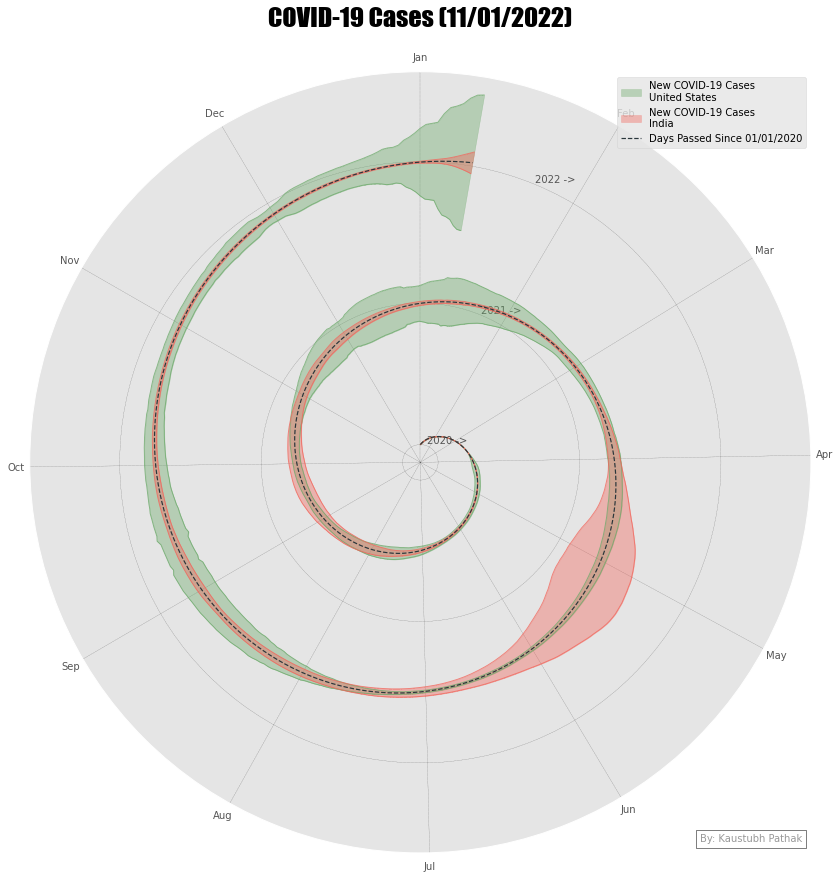

In [39]:
assert data_ind.shape[0] == data_usa.shape[0]

n = data_usa.Days_Passed.max()+1
cases_fac = 0.0005
month_len = pd.Series([31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]).cumsum()
angle = np.linspace(0, 2*np.pi*(n/365) , n)
offset_radius = 100

plt.style.use('ggplot')
fig = plt.figure(figsize=(14,18)) 
ax = fig.add_subplot(111, polar=True)
# ax.set_ylim(bottom = 0)

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2.0)
ax.set_xticks(np.deg2rad(month_len/365.25*360).values)
ax.set_xticklabels([ 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','Jan'])
ax.set_yticks([0+offset_radius,365+offset_radius, 2*365+offset_radius])
# ax.set_yticklabels(["2020 ->", "2021 ->", "2022 ->"])
ax.grid(True, color = "#000000", linewidth = "0.15", linestyle = "--" )


for data, country in zip([data_usa, data_ind],["United States","India"]) :
    cases_factor = (data["new_cases_smoothed"]/2)*cases_fac
    radius = data.Days_Passed.values+offset_radius
    color_p = color_code[country]
    ax.fill_between(angle, radius-cases_factor, radius+cases_factor, alpha = 0.4, color = color_p, label = f"New COVID-19 Cases\n{country}")
    ax.plot(angle, radius-cases_factor, color = color_p, alpha = 0.8, linewidth = "0.9")
    ax.plot(angle, radius+cases_factor, color = color_p, alpha = 0.8, linewidth = "0.9")

ax.plot(angle, radius, "--", color = color_code["line"], linewidth = "1.2", label = "Days Passed Since 01/01/2020")
ax.legend(loc = "upper right")
ancor_text = AnchoredText("By: Kaustubh Pathak", loc = "lower right", prop=dict(alpha=0.4))
ax.add_artist(ancor_text)
ax.set_title("COVID-19 Cases (11/01/2022)", y = 1.05, fontdict={"fontsize":26, "fontname": "impact"})
# ax.text(.5,(365 - ax.get_ylim()[0])/ax.get_ylim()[1], "Text Here", transform=ax.transAxes)
plt.show()

# x = radius * np.cos(angle)
# y = radius * np.sin(angle)
# ax.set_yticklabels([2021, 2022])

# ax = plt.subplot(polar=True)
# ax.plot(angle,radius ,"--")
# plt.axis("off")
# ax.set_xticklabels(['N', '', 'W', '', 'S', '', 'E', ''])
# ax.set_title("Jan 10, 2022")
# plt.tight_layout()
